# Deep Link Prediction

In [1]:
import csv 
import json
import string
import random
import typing

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
from sklearn.model_selection import train_test_split
import keras
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

2021-08-06 12:49:13.631352: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-06 12:49:13.631381: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# python3 -m spacy download en_core_web_sm
english: spacy.lang.en.English = spacy.load("en_core_web_sm")
    
np.random.seed(5)

In [4]:
def random_string(size: int = 10) -> str:
    """
    Generates a random string.
    """
    chars: str = string.ascii_lowercase + "aeiou" * 30 + "rtsmpcnlgr" * 15
    return "".join([
        random.choice(chars)
        for _ in range(size)
    ])

assert isinstance(random_string(), str)
assert random_string() != random_string()
assert len(random_string(10)) == 10
assert len(random_string(20)) == 20

In [5]:
def random_integer(low: int = 0, high: int = 100) -> int:
    """
    Generates a random integer.
    """
    return random.randint(low, high)

assert isinstance(random_integer(), int)
assert random_integer() >= 0
assert random_integer() <= 100
assert random_integer(low=120, high=140) >= 120
assert random_integer(low=120, high=140) <= 140

In [6]:
def random_float(low: int = 0, high: int = 100) -> float:
    """
    Generates a random float number.
    """
    return random.uniform(low, high)

assert isinstance(random_float(), float)
assert random_float() >= 0
assert random_float() <= 100
assert random_float(low=120, high=140) <= 140
assert random_float(low=120, high=140) >= 120

In [11]:
def random_option(options: list) -> str:
    """
    Selects a value from a list randomly.
    """
    return random.choice(list(set(options)))

assert random_option([1, 2, 3]) in [1, 2, 3]

In [12]:
def random_probability() -> float:
    """
    Generates a random probability float number.
    """
    return random.uniform(0, 1)

assert isinstance(random_probability(), float)
assert random_probability() >= 0
assert random_probability() <= 1

In [13]:
def random_event(probability: float = 0.5) -> bool:
    """
    Generates a determines the occurrence of a random event.
    """
    assert probability >= 0
    assert probability <= 1
    return random_probability() < probability

assert isinstance(random_event(), bool)
assert random_event(probability=1) is True
assert random_event(probability=0) is False

In [14]:
def random_city() -> str:
    """
    Generates a random city name.
    """
    return "".join(
        [
            random_string(random_integer(3, 6)),
            random_option([" ", ""]),
            random_string(random_integer(3, 6)),
        ]
    ).title()

assert isinstance(random_city(), str)
assert random_city() != random_city()

In [15]:
def random_country() -> str:
    """
    Generates a random country.
    """
    return "".join(
        [
            random_string(random_integer(3, 6)),
            random_option([" ", ""]),
            random_string(random_integer(3, 6)),
        ]
    ).title()

assert isinstance(random_country(), str)
assert random_country() != random_country()

In [22]:
def random_industry() -> str:
    """
    Generates a random industry.
    """
    return random_string(10)

assert isinstance(random_industry(), str)
assert random_industry() != random_industry()

In [16]:
def random_state() -> str:
    """
    Generates a random state.
    """
    return "".join(
        [
            random_string(random_integer(3, 6)),
            random_option([" ", ""]),
            random_string(random_integer(3, 6)),
        ]
    ).title()

assert isinstance(random_state(), str)
assert random_state() != random_state()

In [17]:
def add_suffix(record: dict, suffix: str) -> dict:
    """
    Appends a suffix to all the keys of a given dictionary.
    """
    return {f"{k}#{suffix}": v for k, v in record.items()}

assert add_suffix({"a": "b"}, "1") == {"a#1": "b"}
assert add_suffix({"a": "b"}, "2") == {"a#2": "b"}

In [19]:
def word2vec(text: typing.Optional[str]) -> np.ndarray:
    """
    Transforms a string into a numpy array of a fixed size.
    """
    if not isinstance(text, str) or text == "":
        return np.zeros(96)
    return english(text).vector

assert isinstance(word2vec("lorem"), np.ndarray)
assert np.array_equal(word2vec("lorem"), word2vec("lorem"))
assert word2vec("lorem").shape == (96, )
assert isinstance(word2vec(""), np.ndarray)
assert np.array_equal(word2vec(""), word2vec(""))
assert word2vec("").shape == (96, )

In [20]:
def similar_string(value: str, mutability: float = 0.2) -> str:
    """
    Generates a random string similar to a given string.
    """
    new_value: list = list(value)
    for i in range(len(new_value)):
        if random_event(mutability):
            new_value[i] = random_string(1)
    if new_value and random_event(mutability):
        new_value.pop(-1)
    if new_value and random_event(mutability):
        new_value.append(random_string(1))
    if not new_value and random_event(mutability):
        new_value: str = random_string(random_integer(4, 12))
    return "".join(new_value)

assert isinstance(similar_string("a", mutability=0.5), str)
assert similar_string("a", mutability=0.0) == "a"
assert similar_string("a", mutability=1.0) != "a"
assert similar_string("aaaaaa", mutability=1.0) != similar_string("aaaaaa", mutability=1)

In [39]:
def random_company(nulls: float = 0.1) -> dict:
    """
    Generates a random Company.
    """
    return {
        'city': '' if random_event(probability=nulls) else random_city(),
        'state': '' if random_event(probability=nulls) else random_state(),
        'country': '' if random_event(probability=nulls) else random_country(),
        'industry': '' if random_event(probability=nulls) else random_industry(),
        'employee_count': None if random_event(probability=nulls) else random_integer(1, 3000),
        'affiliations': random_integer(1, 5000),
        'popularity_score': random_probability(),
        'total_investmnets': None if random_event(probability=nulls) else random_integer(0, 4),
        'valuation': None if random_event(probability=nulls) else random_integer(50000, 500000),
        'average_investment_size': None if random_event(probability=nulls) else random_integer(10000, 100000),
    }


assert isinstance(random_company(), dict)
assert random_company() != random_company()

In [42]:
def random_person(nulls: float = 0.1) -> dict:
    """
    Generates a random Person.
    """
    return {
        'city': '' if random_event(probability=nulls) else random_city(),
        'state': '' if random_event(probability=nulls) else random_state(),
        'country': '' if random_event(probability=nulls) else random_country(),
        'industry': '' if random_event(probability=nulls) else random_industry(),
        'affiliations': random_integer(1, 3000),
        'popularity_score': random_probability(),
        'total_investmnets': None if random_event(probability=nulls) else random_integer(0, 4),
        'average_investment_size': None if random_event(probability=nulls) else random_integer(10000, 100000),
    }


assert isinstance(random_person(), dict)
assert random_person() != random_person()

In [44]:
def random_relationships(nulls: float = 0.1) -> dict:
    """
    Generates a random Affiliation.
    """
    return {
        'introduction_path_length': random_integer(1, 6),
        'introduction_path_score': random_probability(),
        'mutual_connections': random_integer(0, 100),
    }


assert isinstance(random_relationships(), dict)
assert random_relationships() != random_relationships()

In [53]:
def random_person_company_link(
    nulls: float = 0.1,
    connected: bool = False,
    mutability: float = 0.01,
) -> dict:
    """
    Generates a random dictionary representation of the affiliation
    of a Person and a Company.
    """
    company: dict = random_company(nulls=nulls)
    person: dict = random_person(nulls=nulls)
    relationship: dict = random_relationships(nulls=nulls)
    if connected:
        if random_event(probability=0.01):
            # Same country.
            person['country'] = similar_string(company['country'], mutability=mutability)
        elif random_event(probability=0.1):
            # Same state.
            person['state'] = similar_string(company['state'], mutability=mutability)
            person['country'] = similar_string(company['country'], mutability=mutability)
        elif random_event(probability=0.4):
            # Same city.
            person['city'] = similar_string(company['city'], mutability=mutability)
            person['state'] = similar_string(company['state'], mutability=mutability)
            person['country'] = similar_string(company['country'], mutability=mutability)
        if random_event(probability=0.3):
            # Same industry.
            person['industry'] = similar_string(company['industry'], mutability=mutability)
        if random_event(probability=0.3):
            # Very large Company.
            company['employee_count'] = random_integer(3000, 10000)
        if random_event(probability=0.3):
            # Very big Company.
            company['valuation'] = random_integer(1000000, 1000000000)
        if random_event(probability=0.3):
            # Large investments received.
            company['average_investment_size'] = random_integer(100000, 1000000)
        if random_event(probability=0.3):
            # Large investments made.
            person['average_investment_size'] = random_integer(100000, 1000000)
        if random_event(probability=0.3):
            # Highly connected Company.
            company['affiliations'] = random_integer(5000, 50000)
        if random_event(probability=0.3):
            # Highly connected Person.
            person['affiliations'] = random_integer(5000, 50000)
        if random_event(probability=0.3):
            # Popular Person.
            person['popularity_score'] = random_float(0.9, 1.0)
        if random_event(probability=0.3):
            # Popular Company.
            company['popularity_score'] = random_float(0.9, 1.0)
        if random_event(probability=0.3):
            # Highly connected nodes.
            relationship['introduction_path_length'] = random_integer(1, 2)
        if random_event(probability=0.3):
            # High score path.
            relationship['introduction_path_score'] = random_float(0.9, 1.0)
        if random_event(probability=0.3):
            # Lots of mutual connections.
            relationship['mutual_connections'] = random_integer(300, 1000)
    return {
        **add_suffix(person, "person"),
        **add_suffix(company, "company"),
        **add_suffix(relationship, "relationship"),
        "connected": 1 if connected else 0,
    }   


assert isinstance(random_person_company_link(), dict)
assert isinstance(random_person_company_link(connected=True), dict)
assert isinstance(random_person_company_link(connected=False), dict)
assert random_person_company_link() != random_person_company_link()

In [54]:
def random_person_person_link(
    nulls: float = 0.1,
    connected: bool = False,
    mutability: float = 0.01,
) -> dict:
    """
    Generates a random dictionary representation of the affiliation
    of a Person and a Company.
    """
    other: dict = random_person(nulls=nulls)
    person: dict = random_person(nulls=nulls)
    relationship: dict = random_relationships(nulls=nulls)
    if connected:
        if random_event(probability=0.01):
            # Same country.
            person['country'] = similar_string(other['country'], mutability=mutability)
        elif random_event(probability=0.1):
            # Same state.
            person['state'] = similar_string(other['state'], mutability=mutability)
            person['country'] = similar_string(other['country'], mutability=mutability)
        elif random_event(probability=0.4):
            # Same city.
            person['city'] = similar_string(other['city'], mutability=mutability)
            person['state'] = similar_string(other['state'], mutability=mutability)
            person['country'] = similar_string(other['country'], mutability=mutability)
        if random_event(probability=0.3):
            # Same industry.
            person['industry'] = similar_string(other['industry'], mutability=mutability)
        if random_event(probability=0.3):
            # Large investments received.
            other['average_investment_size'] = random_integer(100000, 1000000)
        if random_event(probability=0.3):
            # Large investments made.
            person['average_investment_size'] = random_integer(100000, 1000000)
        if random_event(probability=0.3):
            # Highly connected Person.
            other['affiliations'] = random_integer(5000, 50000)
        if random_event(probability=0.3):
            # Highly connected Person.
            person['affiliations'] = random_integer(5000, 50000)
        if random_event(probability=0.3):
            # Popular Person.
            person['popularity_score'] = random_float(0.9, 1.0)
        if random_event(probability=0.3):
            # Popular Person.
            other['popularity_score'] = random_float(0.9, 1.0)
        if random_event(probability=0.3):
            # Highly connected nodes.
            relationship['introduction_path_length'] = random_integer(1, 2)
        if random_event(probability=0.3):
            # High score path.
            relationship['introduction_path_score'] = random_float(0.9, 1.0)
        if random_event(probability=0.3):
            # Lots of mutual connections.
            relationship['mutual_connections'] = random_integer(300, 1000)
    return {
        **add_suffix(person, "1"),
        **add_suffix(other, "2"),
        **add_suffix(relationship, "relationship"),
        "connected": 1 if connected else 0,
    }   


assert isinstance(random_person_person_link(), dict)
assert isinstance(random_person_person_link(connected=True), dict)
assert isinstance(random_person_person_link(connected=False), dict)
assert random_person_person_link() != random_person_person_link()

Links: (1, 22)
Links: (1, 22)
Links: (1, 22)
Links: (1, 22)


AssertionError: 

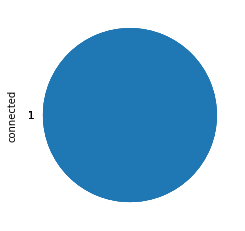

In [58]:
def generate_random_investments_dataset(
    total: int = 1000,
    target: str = 'connected',
    connections: float = 0.5,
    nulls: float = 0.01,
    mutability: float = 0.01,
    feedback: list = None,
    relevance: int = 10,
) -> pd.DataFrame:
    """
    Generates a random dataset of $total relationships between Persons and Companies.
    """
    raw_links_list: typing.List[dict] = [
        random_person_company_link(
            nulls=nulls,
            connected=random_event(probability=connections),
            mutability=mutability
        )
        for _ in range(total)
    ]
    if feedback is not None:
        for case in feedback:
            raw_links_list.extend([{
                **add_suffix(case[0], "company"),
                **add_suffix(case[1], "person"),
                **add_suffix(case[2], "relationship"),
                target: case[3],                
            }] * relevance)
    raw_links_dataframe: pd.DataFrame = pd.DataFrame(raw_links_list)
    raw_links_dataframe[target] = raw_links_dataframe[target].astype(int)
    print("Links:", raw_links_dataframe.shape)
    raw_links_dataframe[target].astype(int).value_counts().plot(kind='pie')
    return raw_links_dataframe

assert isinstance(generate_random_investments_dataset(total=1), pd.DataFrame)
assert not generate_random_investments_dataset(total=1).equals(generate_random_investments_dataset(total=1))
assert generate_random_investments_dataset(total=1).shape == (1, 17)
assert generate_random_investments_dataset(total=2).shape == (2, 17)